In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from google.colab import drive


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Merge the various CVS..

In [ ]:
import pandas as pd
import os

# Function to merge CSV files
def merge_csv_files():
    # List to hold dataframes
    df_list = []

    # Loop through file names and append to the list
    for i in range(1, 14):  # For files RFP_1 to RFP_13
        file_path = f'RFP_{i}.csv'
        if os.path.isfile(file_path):  # Check if file exists
            df = pd.read_csv(file_path)
            df_list.append(df)

    # Add chatGPT file
    if os.path.isfile('chatGPT.csv'):
        df_chatgpt = pd.read_csv('chatGPT.csv')
        df_list.append(df_chatgpt)

    # Concatenate all dataframes
    final_df = pd.concat(df_list, ignore_index=True)

    # Replacing missing values with 0
    final_df = final_df.fillna(0)

    # Save the final dataframe to a new CSV file
    final_df.to_csv('final_dataset.csv', index=False)

    return final_df

# Call the function and get the final merged dataframe
final_dataset = merge_csv_files()

from google.colab import files
files.download('final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Upload the dataset**


* **source**: The source from which the sentence was extracted (e.g. URLs or chatGPT)
* **description**: Textual descriptions related to each record.
* **goal**: Binary variable indicating wether the description is a cloud goal.
* **compute**: Indicates the presence (1) or absence (0) of computing-related content.
* **data handling**: Indicates the presence (1) or absence (0) of data handling-related content.
* **network**: Indicates the presence (1) or absence (0) of network-related content.
* **security & compliance**: Indicates the presence (1) or absence (0) of security & compliance-related content.
* **management & monitoring**: Indicates the presence (1) or absence (0) of management & monitoring-related content.
* **cloud service essentials**: Indicates the presence (1) or absence (0) of cloud service essentials-related content

In [ ]:
# Path to datasset
PATH = '/content/drive/Shareddrives/NextGen Cloud Service Broker/Service Specification/2 - Dataset Creation Phase/final_dataset.csv'

final_dataset = pd.read_csv(PATH)

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source                    2267 non-null   object 
 1   description               2267 non-null   object 
 2   goal                      2267 non-null   int64  
 3   compute                   2267 non-null   float64
 4   data handling             2267 non-null   float64
 5   network                   2267 non-null   float64
 6   security & compliance     2267 non-null   float64
 7   management & monitoring   2267 non-null   float64
 8   cloud service essentials  2267 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 159.5+ KB


In [ ]:
# Print the number of rows in the final dataset
print("Number of rows in the final dataset:", final_dataset.shape[0])

# Checking for Missing Values
missing_values = final_dataset.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)

Number of rows in the final dataset: 2267
Missing Values in Dataset:
 source                      0
description                 0
goal                        0
compute                     0
data handling               0
network                     0
security & compliance       0
management & monitoring     0
cloud service essentials    0
dtype: int64


# **Preparation of the dataset**

The steps are as follows:

* **Convert Binary Columns**: converting the columns into integers. These columns represent target labels for the multi-label classification task.

* **Replace Specific Terms in Descriptions**: is modified the 'description' column by replacing the term "bidder" with "provider." This normalization step is performed to maintain consistency in the terminology used throughout the dataset. It's important for natural language processing tasks to have a consistent use of language to improve the model's ability to understand and predict correctly.

* **Trimming Whitespace and Punctuation**: Next, we trim any leading and trailing whitespace from the 'description' column. This step ensures that our text data is clean and uniform, free from any formatting inconsistencies that might affect the model's performance. Additionally, we remove trailing periods from the descriptions. Such formatting adjustments help in standardizing the text data.

* **Removing Duplicates**: Finally, we remove duplicate entries based on the 'description' column (case insensitive). Duplicates can skew the training process and lead to overfitting, as the model might see the same example multiple times.

In [ ]:
CATEGORIES = ['compute', 'data handling', 'network', 'security & compliance', 'management & monitoring', 'cloud service essentials']

final_dataset[CATEGORIES] = final_dataset[CATEGORIES].astype(int)
final_dataset['description'] = final_dataset['description'].apply(lambda x: x.replace("bidder", "provider").replace("Bidder", "Provider").replace("BIDDER", "Provider"))

final_dataset["description"] = final_dataset["description"].str.strip()
final_dataset["description"] = final_dataset["description"].str.rstrip('.')

In [ ]:
# Check for duplicates

# Convert 'description' to lowercase for a case-insensitive duplicate check and store in a temporary column
final_dataset['temp_description_lower'] = final_dataset['description'].str.lower()

# Check for duplicates (put on variable to print)
duplicates_case_insensitive = final_dataset['temp_description_lower'].duplicated().sum()

# Drop duplicates based on the temporary lowercase column, keeping the first occurrence
final_dataset = final_dataset.drop_duplicates(subset=["temp_description_lower"], keep='first')

# Drop the temporary column
final_dataset = final_dataset.drop(columns=['temp_description_lower']).reset_index(drop=True)

print(f"Number of case-insensitive duplicates: {duplicates_case_insensitive}")

Number of case-insensitive duplicates: 103


In [ ]:
# Replace "chatGPT" with "AI_generated" in the 'source' column
final_dataset.loc[final_dataset['source'] == 'chatGPT', 'source'] = 'AI_generated'


In [ ]:
final_dataset

,source,description,goal,compute,data handling,network,security & compliance,management & monitoring,cloud service essentials
0,https://nrcassam.nic.in/pdf/RFP%20for%20Select...,The Provider will be responsible for provision...,1,1,1,1,0,0,0
1,https://nrcassam.nic.in/pdf/RFP%20for%20Select...,The proposed landscape for the deployment of N...,0,0,0,0,0,0,0
2,https://nrcassam.nic.in/pdf/RFP%20for%20Select...,The above environments are to be deployed on t...,1,0,0,1,0,0,0
3,https://nrcassam.nic.in/pdf/RFP%20for%20Select...,The environment of Virtual Private Cloud/Gover...,1,0,0,0,1,0,0
4,https://nrcassam.nic.in/pdf/RFP%20for%20Select...,Each of the environments mentioned above shoul...,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2159,https://www.agriseta.co.za/wp-content/uploads/...,Any additional costing as per vendor specifica...,0,0,0,0,0,0,0
2160,https://www.agriseta.co.za/wp-content/uploads/...,The hosted virtual servers should only be bill...,1,0,0,0,0,1,0
2161,https://www.agriseta.co.za/wp-content/uploads/...,Any virtual servers that are switched off will...,1,0,0,0,0,1,0
2162,https://www.agriseta.co.za/wp-content/uploads/...,Costing must be on a resource use basis,0,0,0,0,0,0,0


# **Data Exploration**
The notebook's goal is to meticulously analyze the dataset for a multi-label classification problem. The analysis explores the distribution of the 'Goal' column and evaluates data spread across sources, providing insights into class balance and source variability. Further, it delves into the distribution of cloud categories, revealing the frequency and importance of each category. Co-occurrence analysis of cloud features in goal-oriented sentences uncovers patterns in feature combinations, enhancing understanding of feature interrelations. Word cloud visualization for each cloud category identifies key terms, aiding in feature understanding. Sentence length distribution analysis ensures compatibility with model constraints like BERT's token limit. Finally, analyzing uppercase word frequency in descriptions helps identify key technical terms, crucial for understanding domain-specific language usage.




## **1) Total Distribution of "Goal" Column**

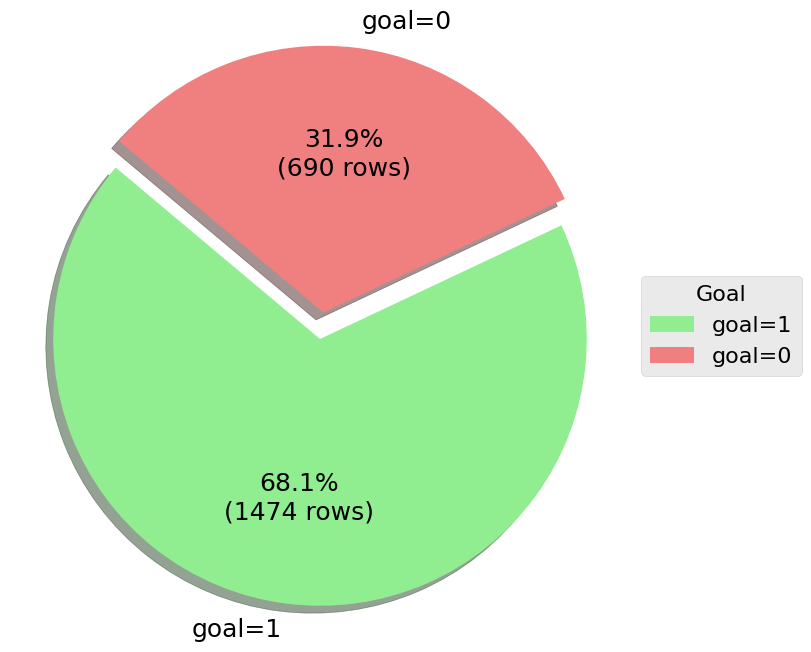

In [ ]:
goal_1_count = len(final_dataset[final_dataset['goal'] == 1])
goal_0_count = len(final_dataset[final_dataset['goal'] == 0])

# Pie chart details
labels = ['goal=1', 'goal=0']
sizes = [goal_1_count, goal_0_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the "Goal=1" slice

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda p: '{:.1f}%\n({:.0f} rows)'.format(p, p * sum(sizes) / 100),
    shadow=True,
    startangle=140
)

# Font sizes
for text in texts + autotexts:
    text.set_fontsize(18)

ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Legend
ax.legend(wedges, labels, title='Goal', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=16, title_fontsize=16)

plt.show()


## **2) Analysis of sources**


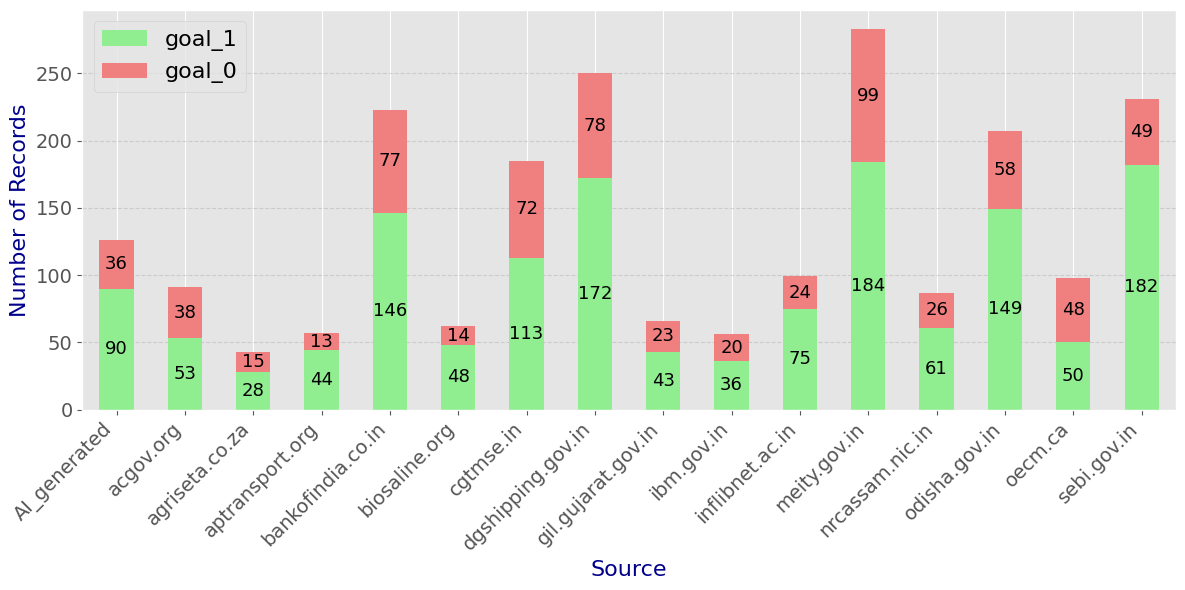

In [ ]:
from urllib.parse import urlparse

# Function to check if a string is a valid URL
def is_url(string):
    try:
        result = urlparse(string)
        return all([result.scheme, result.netloc])
    except ValueError:
        return False

# Function to extract domain from a URL
def extract_domain_from_url(url):
    try:
        parsed_url = urlparse(url)
        domain = parsed_url.netloc if parsed_url.netloc else url
        # Remove 'www.' prefix if present
        if domain.startswith('www.'):
            domain = domain[4:]  # Skip the first 4 characters 'www.'
        return domain
    except ValueError:
        return url

final_dataset['clean_source'] = final_dataset['source'].apply(lambda x: extract_domain_from_url(x) if is_url(x) else x)

# Grouping by 'clean_source' and calculating
source_group = final_dataset.groupby('clean_source').agg(
    goal_0=pd.NamedAgg(column="goal", aggfunc=lambda x: (x == 0).sum()),
    goal_1=pd.NamedAgg(column="goal", aggfunc=lambda x: (x == 1).sum())
)

# Graph creation
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))
source_group[['goal_1', 'goal_0']].plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=ax)

# Font sizes
plt.xlabel('Source', fontsize=16)
plt.ylabel('Number of Records', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')

# Grid visibility and aesthetics
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Annotation of graph with values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='black', fontsize=13)

ax.legend(fontsize=16, loc='upper left')

plt.tight_layout()
plt.show()


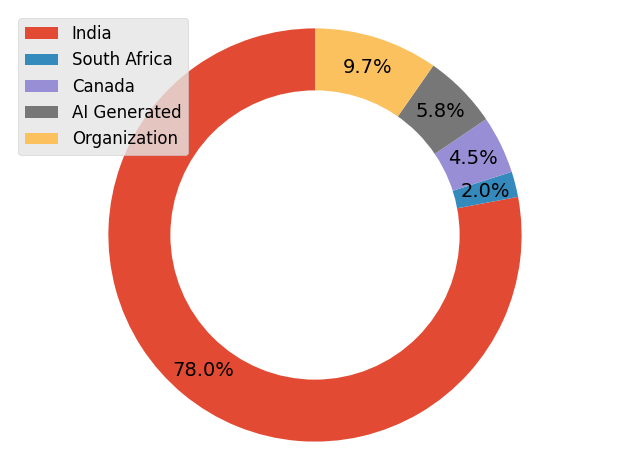

In [ ]:
# Mapping of domain extensions to countries
country_map = {
    'in': 'India',
    'ca': 'Canada',
    'za': 'South Africa',
    'org': 'Organization',
}

# Function to extract the domain extension and map it to country
def map_country(domain):
    # Extract the last two parts of the domain (e.g., 'gov.in' from 'www.miet.gov.in')
    parts = domain.split('.')
    if len(parts) > 1 and parts[-1] in country_map:
        return country_map[parts[-1]]
    return 'AI Generated'  # Default category for domains not listed in country_map

# Apply the mapping function to the 'clean_source' column
final_dataset['country'] = final_dataset['clean_source'].apply(map_country)

# Group by 'country' and sum the counts
country_counts = final_dataset.groupby('country').size().reset_index(name='counts')

# Sort the counts in descending order
country_counts_sorted = country_counts.sample(frac=1).reset_index(drop=True)

labels = country_counts_sorted['country'].tolist()
sizes = country_counts_sorted['counts'].tolist()

# Create a donut plot with percentages and specify font size for autopct
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Increase font size for autotexts (percentages)
for autotext in autotexts:
    autotext.set_size(14)

# Add legend with country names
plt.legend(labels=country_counts_sorted['country'], loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
country_counts_sorted

,country,counts
2,India,1687
3,Organization,210
0,AI Generated,126
1,Canada,98
4,South Africa,43


## **3) Distribution Analysis of Cloud Categories in the Dataset**
Considering the class distribution in this multi-label classification problem, the range of class frequencies, while showing some variation, does not exhibit extreme imbalance. The classes 'Compute', 'Data Handling', 'Network', 'Security & Compliance', 'Management & Monitoring', and 'Cloud Service Essentials' display a distribution where the least frequent class ('Data Handling') has 182 instances and the most frequent ('Management & Monitoring') has 553. This suggests that the class imbalance is not significantly severe to necessitate aggressive corrective measures such as resampling techniques or weighted loss functions, which are typically more crucial in cases of extreme class imbalances.

<ipython-input-44-31e88150ad47>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


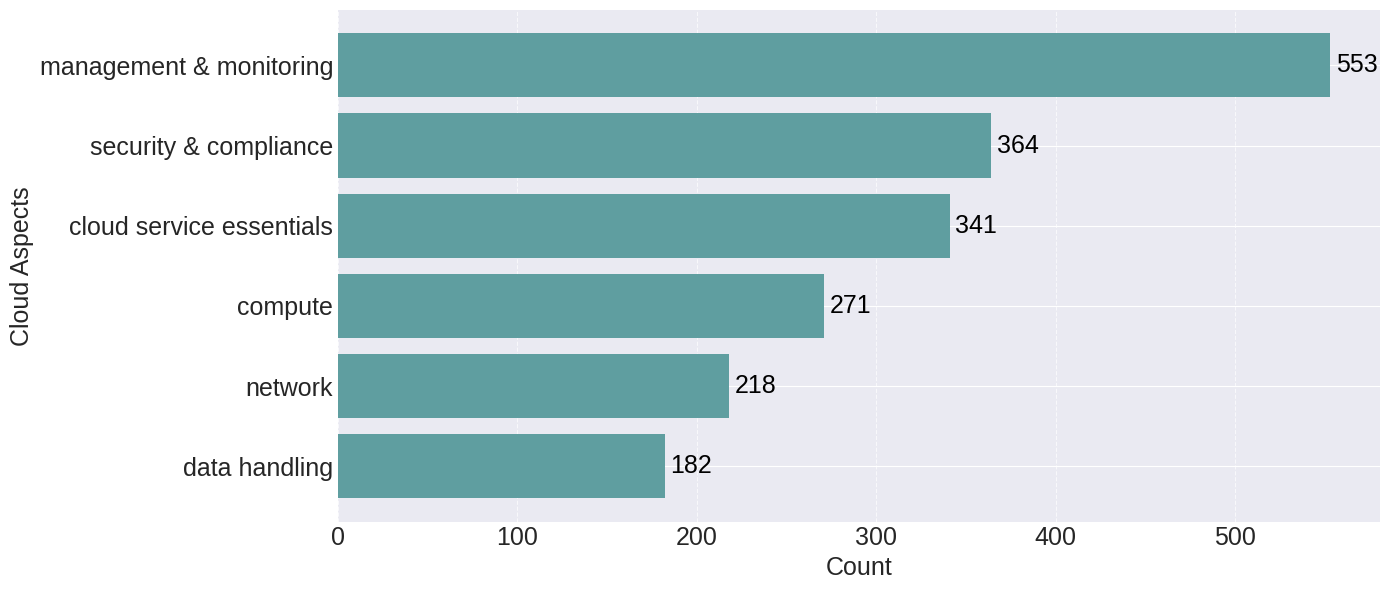

In [ ]:
# Count rows for each cloud aspect
aspect_counts = {cat: len(final_dataset[final_dataset[cat] == 1]) for cat in CATEGORIES}

# Sort counts for better visualization
sorted_aspects = sorted(aspect_counts.items(), key=lambda x: x[1], reverse=True)

# Unpack the sorted items for plotting
aspects, counts = zip(*sorted_aspects)

# Create a horizontal bar chart
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 6))
bars = plt.barh(aspects, counts, color='cadetblue')

# Add labels and title
plt.xlabel('Count', fontsize=18)
plt.ylabel('Cloud Aspects', fontsize=18)

# Invert y-axis to have the highest count at the top
plt.gca().invert_yaxis()

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with exact counts
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height()/2, f'{width}',
             va='center', fontsize=18, color='black')

# Font size for tick labels on both axes
plt.tick_params(axis='both', which='major', labelsize=18)


plt.tight_layout()
plt.show()


## **4) Exploring Feature Interconnections and Correlations**
In this section, we explore the interconnections between cloud features for goal-specific sentences in the dataset. The goal is to identify how frequently different combinations of features co-occur. This co-occurrence analysis informs us about common pairings of cloud aspects, which is pivotal for structuring cloud services and guiding feature development priorities.

Additionally, we examine a correlation heatmap for binary columns representing cloud categories. Each heatmap cell shows a correlation coefficient, shedding light on significant relationships or dependencies between categories. This visual correlation matrix is crucial to understand the interplay between labels in our multi-label classification task, highlighting potential co-occurrences and exclusivities that can influence model training and feature engineering. A value of 1 (red) means a perfect positive correlation, which naturally occurs with a category compared to itself. The other values range from positive (red shades) to negative (blue shades), indicating how frequently the categories occur together. Positive values closer to 1 suggest categories often appear together, while negative values suggest that when one category appears, the other is less likely to be present.

<ipython-input-15-e036905d9999>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Count', y='Feature Set', data=set_df, palette='viridis')


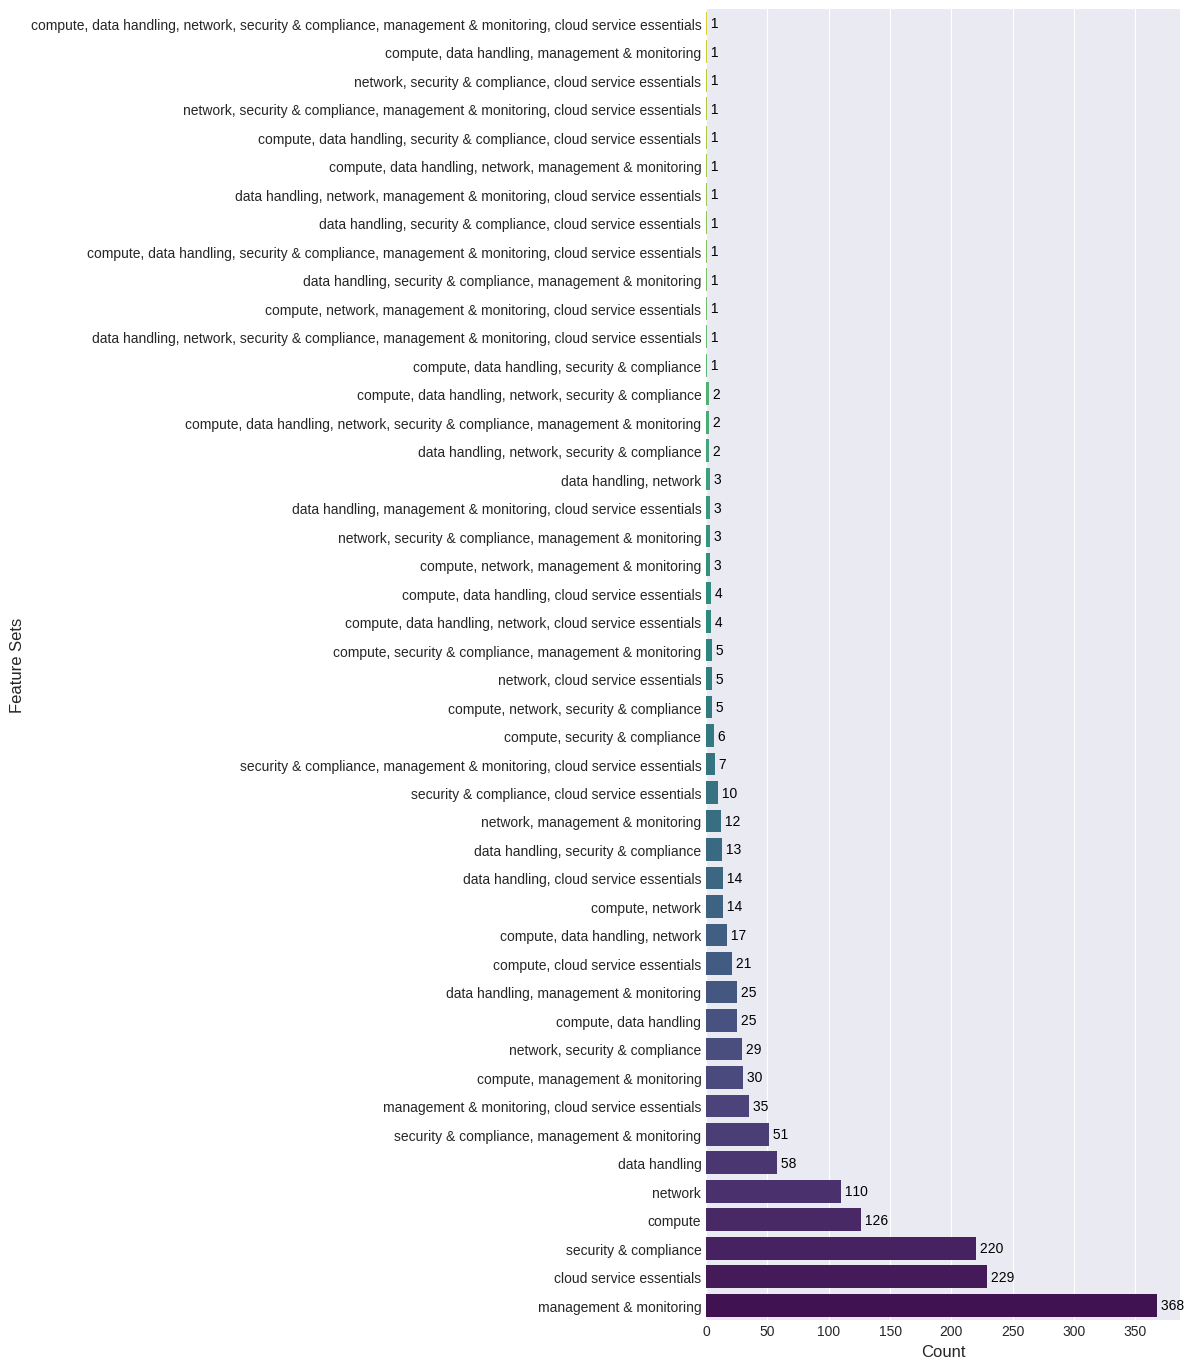

In [ ]:
# Select rows where 'goal' is 1 and only the cloud features columns
goal_rows = final_dataset[final_dataset['goal'] == 1]
cloud_features_columns = final_dataset.columns[3:]

# Calculate the unique set of features that appear together in each goal row
feature_sets = [tuple(row.index[row == 1]) for _, row in goal_rows[cloud_features_columns].iterrows()]

# Count the frequencies of each unique set of features
set_counts = Counter(feature_sets)

# Filter sets with a count greater than zero
filtered_sets = {feature_set: count for feature_set, count in set_counts.items() if count > 0}

# Convert the count to a DataFrame for plotting
set_df = pd.DataFrame(list(filtered_sets.items()), columns=['Feature Set', 'Count'])
set_df['Feature Set'] = set_df['Feature Set'].apply(lambda x: ', '.join(x))
set_df = set_df.sort_values(by='Count', ascending=False)

# Dynamically adjust the plot height based on the number of feature sets
plot_height = max(10, len(set_df) * 0.3)

# Create a horizontal bar chart with seaborn
plt.figure(figsize=(12, plot_height))
bars = sns.barplot(x='Count', y='Feature Set', data=set_df, palette='viridis')

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Feature Sets', fontsize=12)

# Invert the y-axis to have the highest count at the top
plt.gca().invert_yaxis()

# Annotate each bar with the exact count
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f' {int(bar.get_width())}', va='center', fontsize=10, color='black')


plt.tight_layout()
plt.show()



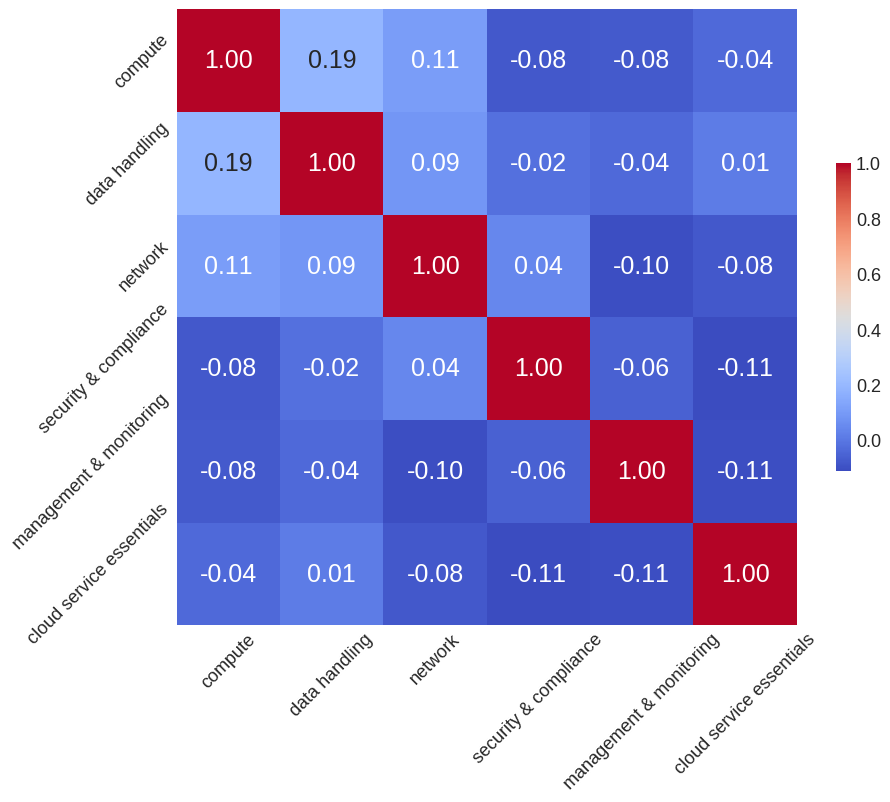

In [ ]:
corr_matrix = final_dataset[CATEGORIES].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink': .5}, annot_kws={'size': 18})

# Rotate tick labels for better visibility
plt.xticks(rotation=45, fontsize=13)
plt.yticks(rotation=45, fontsize=13)

# Adjust the color bar label size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=13)

plt.show()

## **5) Most used words in sentences in each cloud category**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Word Cloud for Compute Category:


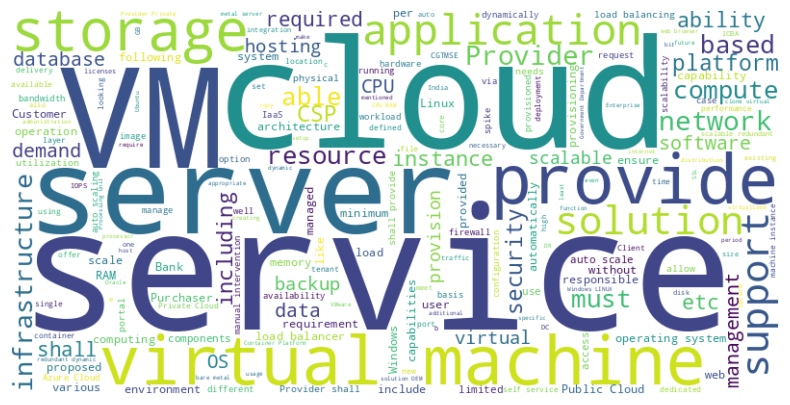

Word Cloud for Data Handling Category:


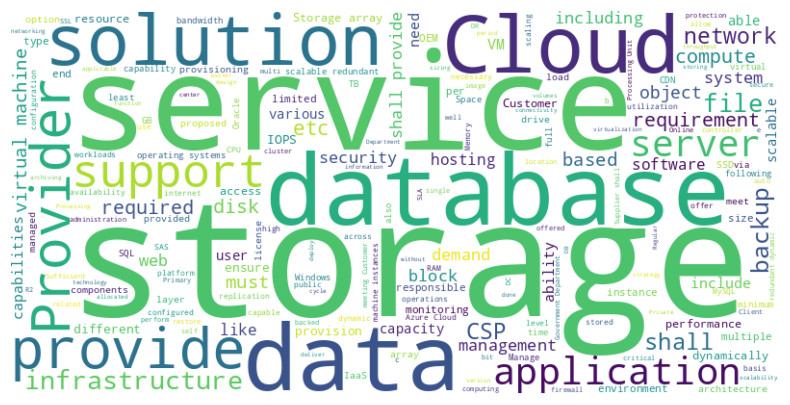

Word Cloud for Network Category:


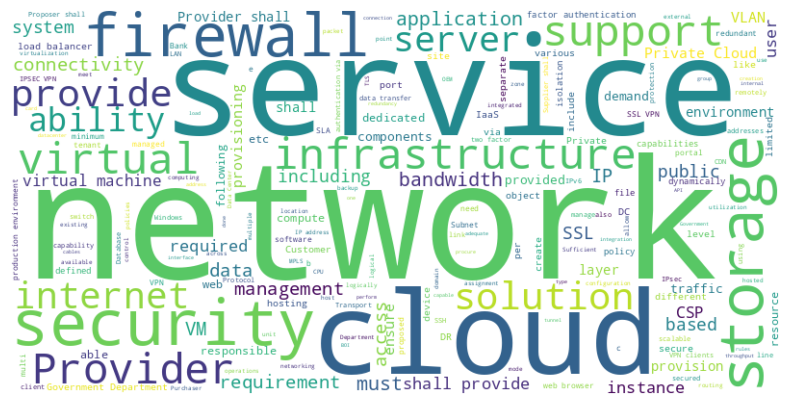

Word Cloud for Security & Compliance Category:


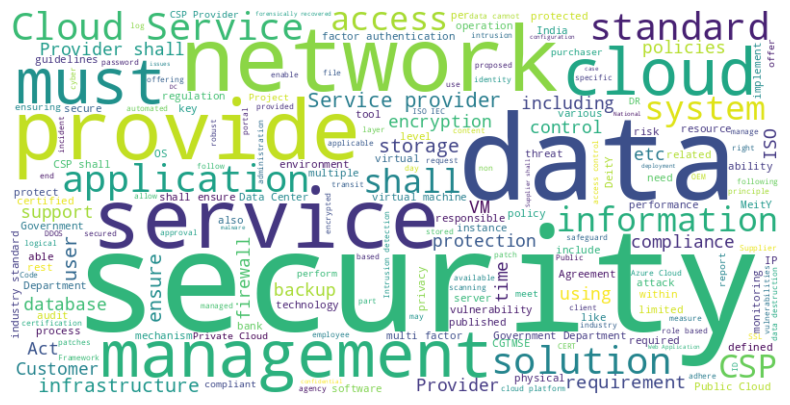

Word Cloud for Management & Monitoring Category:


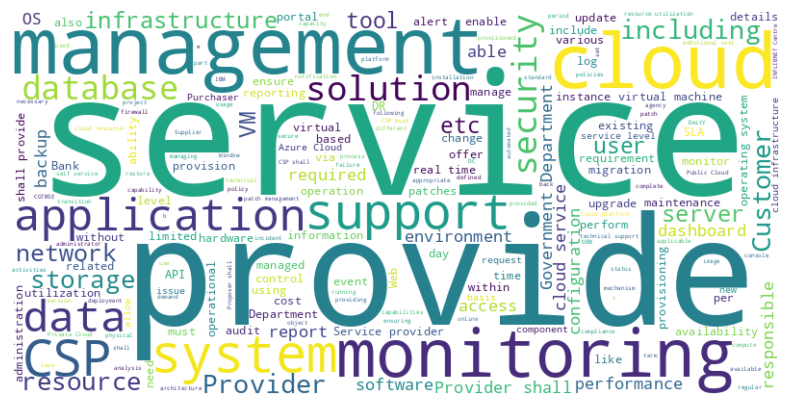

Word Cloud for Cloud Service Essentials Category:


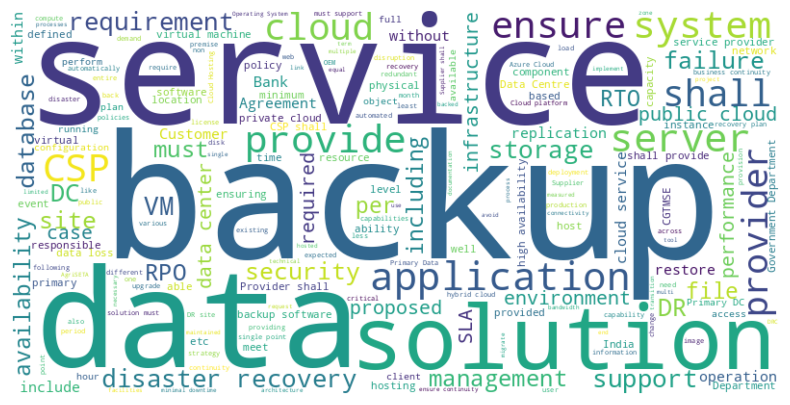

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Download the list of stopwords
nltk.download('stopwords')

# Set of english stopwords
stop_words = set(stopwords.words('english'))

# Generate wordcloud of a given category (without stopwords)
def create_word_cloud(category):
  # Filter the dataframe
  category_df = final_dataset[final_dataset[category] == 1]['description']

  # Combine all description of the category in a single text
  text = " ".join(description for description in category_df)

  # Generate a word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

  # Visualize
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

for category in CATEGORIES:
  print(f"Word Cloud for {category.title()} Category:")
  create_word_cloud(category)


## **6) Distribution of Sentence Lengths**
We want to understand how sentence lengths are distributed in the dataset. It can help to identify anomalies, such as a large number of extremely short or long sentences (BERT model has a limit of 512 tokens). A balanced distribution (e.g., a bell-like shape) is generally desirable because it indicates that there is not too much imbalance in sentence lengths. We can have an intuation about what to set as max_length for our tokenized descriptions.

Most of the sentences have a concentrated length between about 0 and 50 words, with the highest peak around 10 to 20 words. This indicates that the majority of sentences in the dataset are relatively short.

Average Sentence Length: 22.02865064695009
Minimum Sentence Length: 3
Maximum Sentence Length: 174
24x7 technical support
 The Supplier shall provide effective support to Customers including, but not limited to: a) Providing a responsive account executive (with applicable back-up) assigned to the Customer to support their needs by providing day-to-day and ongoing administrative support, and operational support; b) Managing issue resolution in a timely manner; c) Complying with agreed upon escalation processes to resolve outstanding issues; d) Responding to Customer’s inquiries (to day-to-day activities) within one (1) Business Day; e) Ensuring minimal disruption to the Customer; f) Providing easy access to the Supplier (online, toll free telephone number, email, voicemail, chat or fax); g) Providing training/demonstrations, knowledge transfer, and no-cost educational events (webinars), if available; h) Establishing an ongoing communications program with the Customer (new initiatives, i

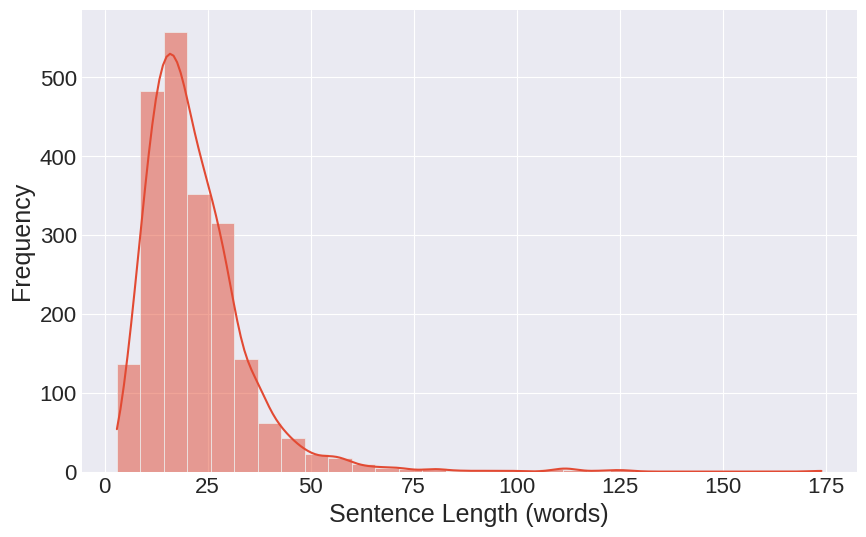

In [ ]:
# Analysis of Sentence Length
final_dataset['sentence_length'] = final_dataset['description'].apply(lambda x: len(x.split()))
print("Average Sentence Length:", final_dataset['sentence_length'].mean())
print("Minimum Sentence Length:", final_dataset['sentence_length'].min())
min_length_description = final_dataset[final_dataset['sentence_length'] == 3]['description'].iloc[0]

print("Maximum Sentence Length:", final_dataset['sentence_length'].max())
max_length_description = final_dataset[final_dataset['sentence_length'] == 174]['description'].iloc[0]

print(min_length_description+"\n", max_length_description)

# Visualization of Sentence Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_dataset['sentence_length'], bins=30, kde=True)
plt.xlabel('Sentence Length (words)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 7) **Uppercase Word Analysis for Model Selection**

We delve into the frequency of uppercase words within our dataset. The rationale for this examination is to inform the decision-making process regarding the choice between case-sensitive and case-insensitive models for our NLP tasks.

BERT and RoBERTa models come in two flavors: cased and uncased. The cased models maintain the case of the words, which could be crucial for understanding the semantic meaning in certain contexts, such as proper nouns or acronyms. On the other hand, uncased models disregard letter case, which can be beneficial for reducing model complexity and potentially increasing robustness to variations in capitalization.

By analyzing the prevalence and distribution of uppercase words in our dataset, we aim to determine whether case plays a significant role in the semantics of our data. If uppercase words are prevalent and carry specific meanings or importance, a case-sensitive model like RoBERTa cased might be preferable. Conversely, if uppercase words are not particularly informative or are random, an uncased model like BERT uncased may suffice.

The bar chart reveals a substantial occurrence of uppercase words within the dataset. However, it is observed that many of these uppercase instances are not unique identifiers like proper nouns or acronyms but are rather common words capitalized likely due to their position in a sentence, such as at the beginning. This pattern suggests that the capitalization is not a significant feature for semantic interpretation in this context. Consequently, the efficiency and simplicity of an uncased model like BERT uncased might actually be advantageous. Such a model inherently normalizes the text by converting it to lowercase, which would prevent the model from attributing unnecessary significance to random capitalization and could potentially lead to more consistent performance when processing natural language data.


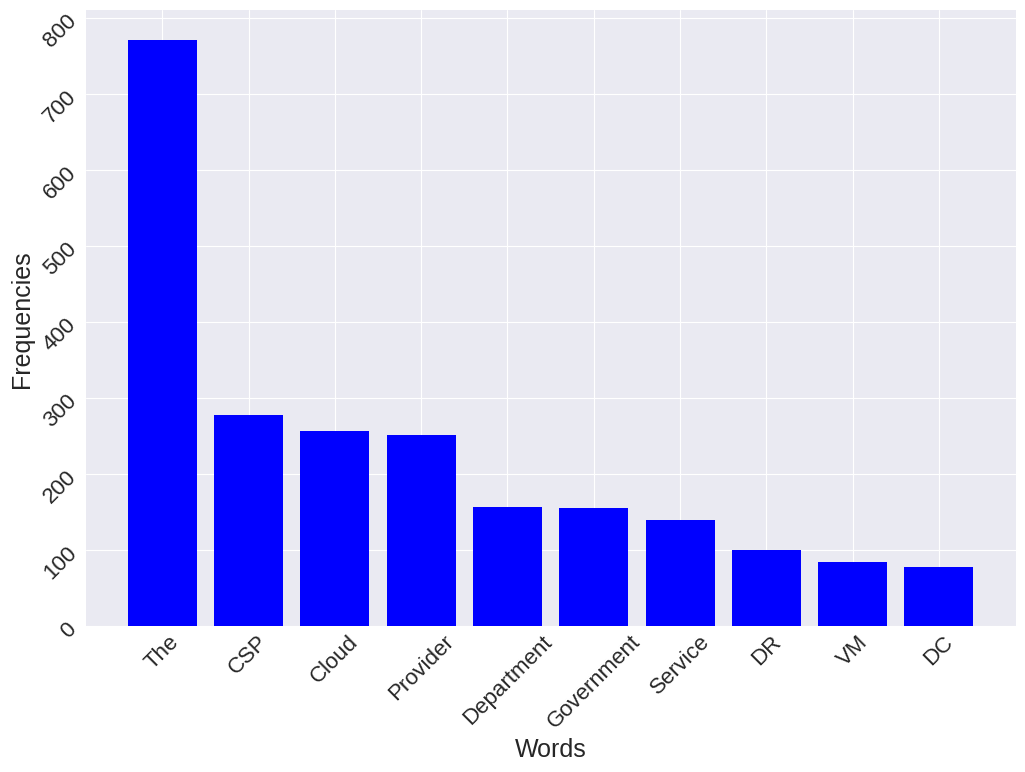

In [ ]:
import re

def count_uppercase_words(text):
    """ Function to count words with uppercase letters in a string """
    # Extracting words using regular expression
    words = re.findall(r'\b[A-Za-z]+\b', text)
    # Filtering words with uppercase letters
    uppercase_words = [word for word in words if any(c.isupper() for c in word)]
    return uppercase_words

# Creating the counter
uppercase_word_counter = Counter()

# Iterating over the dataset
for description in final_dataset['description']:
    uppercase_words = count_uppercase_words(description)
    uppercase_word_counter.update(uppercase_words)

# Converting the counter to a dictionary and sorting it by frequencies
uppercase_frequencies = dict(sorted(uppercase_word_counter.items(), key=lambda item: item[1], reverse=True))

# Graphical visualization
top_n = 10
top_words = list(uppercase_frequencies.keys())[:top_n]
top_frequencies = list(uppercase_frequencies.values())[:top_n]

plt.figure(figsize=(12, 8))
plt.bar(top_words, top_frequencies, color='blue')
plt.xlabel('Words', fontsize=18)
plt.ylabel('Frequencies', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(rotation=45, fontsize=16)
plt.show()

